In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from UncorrelatedFBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 5 * 10**3
lr = 1e-4

In [4]:
model.load_model("models/100DCallOption1.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 24800, Loss: 3.272e+02, Y0: 5.038, Time: 1.17, Learning Rate: 3.000e-04
It: 24900, Loss: 2.599e+02, Y0: 5.160, Time: 67.88, Learning Rate: 3.000e-04
It: 25000, Loss: 3.618e+02, Y0: 5.047, Time: 69.16, Learning Rate: 3.000e-04
It: 25100, Loss: 1.962e+02, Y0: 4.992, Time: 69.39, Learning Rate: 3.000e-04
It: 25200, Loss: 2.631e+02, Y0: 5.196, Time: 69.69, Learning Rate: 3.000e-04
It: 25300, Loss: 2.640e+02, Y0: 5.245, Time: 69.35, Learning Rate: 3.000e-04
It: 25400, Loss: 3.432e+02, Y0: 4.964, Time: 69.88, Learning Rate: 3.000e-04
It: 25500, Loss: 2.322e+02, Y0: 5.179, Time: 69.36, Learning Rate: 3.000e-04
It: 25600, Loss: 3.105e+02, Y0: 5.070, Time: 69.09, Learning Rate: 3.000e-04
It: 25700, Loss: 2.245e+02, Y0: 5.091, Time: 69.22, Learning Rate: 3.000e-04
It: 25800, Loss: 2.062e+02, Y0: 5.085, Time: 69.20, Learning Rate: 3.000e-04
It: 25900, Loss: 6.492e+02, Y0: 5.560, Time: 69.33, Learning Rate: 3.000e-04
It: 26000, Loss: 2.304e+02, Y0: 5.218, Time: 68.85, Learning Rate: 3.0

In [6]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [7]:
graph = model.iteration, model.training_loss

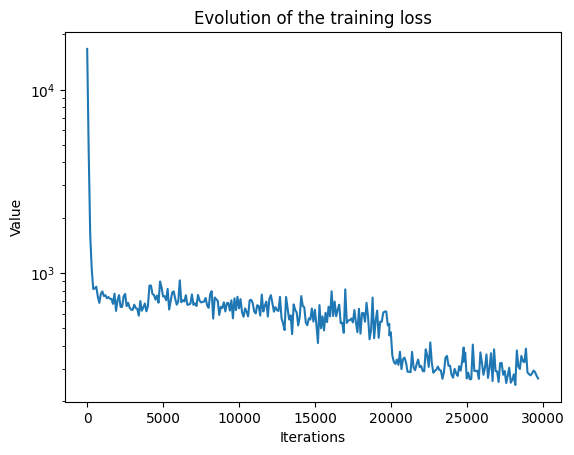

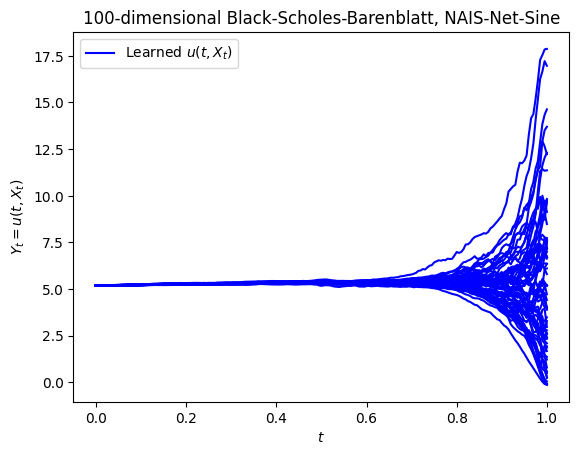

In [8]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [9]:
Y_pred.shape

(8192, 201, 1)

In [10]:
Y_preds = Y_pred.reshape(8192, 201)

In [11]:
time_stamps = t_test[0].reshape(201,)
time_stamps

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [12]:
r = 0.05

In [13]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.182445 , 5.1836066, 5.1846333, 5.185567 , 5.1863503, 5.18709  ,
       5.187778 , 5.1883354, 5.1889668, 5.1896186, 5.190282 , 5.1910768,
       5.191901 , 5.192898 , 5.193971 , 5.1952076, 5.1965303, 5.1979756,
       5.1994224, 5.200926 , 5.20254  , 5.2041144, 5.205689 , 5.2072315,
       5.2086773, 5.210041 , 5.211309 , 5.2124104, 5.213498 , 5.2144833,
       5.215326 , 5.216076 , 5.2167053, 5.217283 , 5.21774  , 5.2181015,
       5.218322 , 5.2183437, 5.218341 , 5.2181487, 5.217873 , 5.2175245,
       5.2171335, 5.2166634, 5.2161884, 5.21571  , 5.2153606, 5.2150464,
       5.214834 , 5.2148323, 5.214883 , 5.2151666, 5.215458 , 5.215849 ,
       5.216178 , 5.216526 , 5.217028 , 5.217438 , 5.217738 , 5.217931 ,
       5.2180862, 5.218166 , 5.218217 , 5.2182064, 5.2181687, 5.2183313,
       5.2186427, 5.219088 , 5.2196403, 5.2203355, 5.22111  , 5.222028 ,
       5.2230496, 5.22402  , 5.224986 , 5.225915 , 5.226648 , 5.2272487,
       5.227792 , 5.2281194, 5.228309 , 5.2284102, 

In [14]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [77]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[20000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([20000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([20000, D]) * 1
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [78]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 1, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 200]

In [81]:
mc_price

array([[5.08168339]])

In [82]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

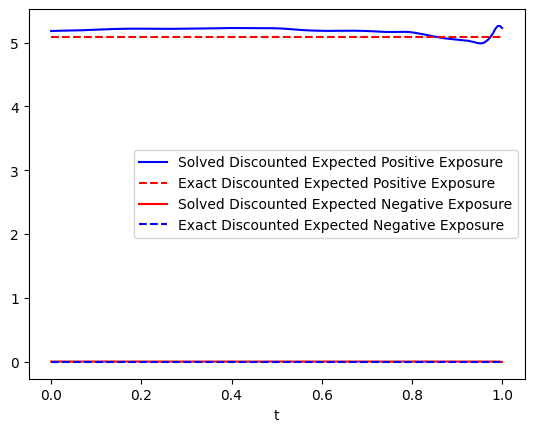

In [83]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [84]:
model.save_model("models/100DCallOption1.pth")